In [4]:
## import basic libraries 
import numpy as np 
import pandas as pd 
import os 

In [5]:
os.chdir(r"C:\Users\christopher\Desktop\hacker_earth")

In [156]:
df_train=pd.read_csv('train.csv')
df_train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [157]:
## with dates 
df_train_transformed=pd.read_csv('train_transformed.csv')
df_train_transformed.head()

,condition,color_type,length_m,height_cm,x1,x2,pet_category,breed_category,issue_date_dow,issue_date_month,issue_date_year,listing_date_dow,listing_date_month,listing_date_year
0,2,Brown Tabby,0.80,7.78,13,9,1,0,Sun,Jul,2016,Wed,Sep,2016
1,1,White,0.72,14.19,13,9,2,0,Thu,Nov,2013,Thu,Dec,2018
2,2,Brown,0.15,40.90,15,4,4,2,Sun,Sep,2014,Wed,Oct,2016
3,1,White,0.62,17.82,0,1,2,0,Sat,Dec,2016,Fri,Jan,2019
4,2,Black,0.50,11.06,18,4,1,0,Thu,Sep,2017,Sun,Nov,2017


In [9]:
df_train['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [10]:
df_train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [22]:
def glimpse(data):
    print(f'shape:{data.shape}')
    print(f'Infor:{data.info()}')
    return data.head(5)
def unique(df, column):
    return df[column].nunique()

In [23]:
df_train_transformed.duplicated().value_counts() # there is no duplicates present 

False    18834
dtype: int64

In [25]:
# df_train['breed_category']
print(unique(df_train_transformed,'breed_category'))
print(unique(df_train_transformed,'pet_category'))

20
4


### encoding into appropriate data types

In [39]:
# condition  pet_category breed_category # these will be as categories 

# color_type issue_date_dow	issue_date_month	issue_date_year	listing_date_dow	listing_date_month	listing_date_year
# these should be label encoded
label_data=['color_type', 'issue_date_dow','issue_date_month',
                                 'issue_date_year','listing_date_dow','listing_date_month','listing_date_year']
cat_data=['condition','pet_category','breed_category']
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col_tr = make_column_transformer((le,label_data))
df = col_tr.fit_transform(df_train_transformed)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

## impute the missing condition 

In [11]:
df=df_train_transformed

In [12]:
df[label_data]=df[label_data].astype('category')

NameError: name 'label_data' is not defined

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 14 columns):
condition             18834 non-null int64
color_type            18834 non-null object
length_m              18834 non-null float64
height_cm             18834 non-null float64
x1                    18834 non-null int64
x2                    18834 non-null int64
pet_category          18834 non-null int64
breed_category        18834 non-null int64
issue_date_dow        18834 non-null object
issue_date_month      18834 non-null object
issue_date_year       18834 non-null int64
listing_date_dow      18834 non-null object
listing_date_month    18834 non-null object
listing_date_year     18834 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 2.0+ MB


In [158]:
X =df_train.drop(columns=['breed_category','pet_category'])
y1 = df_train['breed_category']
y2 = df_train['pet_category']

X['issue_date_year']=X['issue_date'].map(lambda x: x.strip('-')[0:4])
X['listing_date_year']=X['listing_date'].map(lambda x: x.strip('-')[0:4])
X.drop(['listing_date','issue_date','pet_id'],1,inplace=True)

X['color_type'] = X['color_type'].astype('category').cat.codes
# test_df['color_type'] = test_df['color_type'].astype('category').cat.codes
X[['issue_date_year','listing_date_year']]=X[['issue_date_year','listing_date_year']].astype('category')

## this one is from knn imputation in R 
X['condition']=df_train_transformed['condition']


In [159]:
X['pet_category']=y2
X.head()

,condition,color_type,length(m),height(cm),X1,X2,issue_date_year,listing_date_year,pet_category
0,2,18,0.80,7.78,13,9,2016,2016,1
1,1,53,0.72,14.19,13,9,2013,2018,2
2,2,15,0.15,40.90,15,4,2014,2016,4
3,1,53,0.62,17.82,0,1,2016,2019,2
4,2,2,0.50,11.06,18,4,2017,2017,1


In [160]:
dummy_X=pd.get_dummies(X[['color_type','issue_date_year','listing_date_year','condition','pet_category']])
X_=X[['height(cm)','length(m)','X1','X2']]
X_mat=pd.concat([dummy_X,X_],axis=1)
X_mat=X_mat.drop(['issue_date_year_1994','issue_date_year_1995','issue_date_year_1997'],axis=1)
X_mat.head()

,color_type,condition,pet_category,issue_date_year_1998,issue_date_year_1999,issue_date_year_2000,issue_date_year_2001,issue_date_year_2002,issue_date_year_2003,issue_date_year_2004,...,issue_date_year_2019,listing_date_year_2015,listing_date_year_2016,listing_date_year_2017,listing_date_year_2018,listing_date_year_2019,height(cm),length(m),X1,X2
0,18,2,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,7.78,0.80,13,9
1,53,1,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,14.19,0.72,13,9
2,15,2,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,40.90,0.15,15,4
3,53,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,17.82,0.62,0,1
4,2,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,11.06,0.50,18,4


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_mat, y1, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (15067, 34) (15067,)
Test set: (3767, 34) (3767,)


In [167]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

predictions=clf.predict(X_test)

predictions=pd.DataFrame(predictions)
y_test=pd.DataFrame(y_test)
print(predictions.shape,y_test.shape)

from sklearn.metrics import f1_score
f1_score(predictions,y_test,average="weighted")

C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(3767, 1) (3767, 1)


0.820567058893148

In [98]:
# from sklearn.ensemble import IsolationForest
# anomalies = IsolationForest(contamination=0.05).fit_predict(X_train)
# print("Rows with anomalies: ", np.where(anomalies<1))
# print(len(anomalies))

In [21]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV, train_test_split

In [1]:
# param_grid={"degree":[1,2,3,4,5,6]}
# param_grid

# from sklearn.pipeline import make_pipeline
# model = clf
# reg = GridSearchCV(model, param_grid=param_grid,cv=5, scoring="accuracy")
# reg.fit(X_mat,y1)

# print(reg.best_score_, reg.best_params_)

In [168]:
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.f1_score(prediction,y_test,average='weighted'))

C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.8613412199836573


In [170]:
## Hyperparameter tuning for the random forest

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [169]:
print("Accuracy:",metrics.f1_score(prediction,y_test,average='weighted'))

Accuracy: 0.8613412199836573


In [166]:
model1.cv_results_

C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\christopher\Anaconda3\lib\si

{'mean_fit_time': array([0.29916096, 0.23786338, 0.27917218, 0.35013247, 0.34769114,
        0.22776047, 0.2032907 , 0.30349183, 0.33768662, 0.44087426,
        0.25692018, 0.24353091, 0.28034155, 0.32665189, 0.40179944,
        0.15091364, 0.14659222, 0.19755236, 0.32214912, 0.3148191 ,
        0.19688646, 0.20292481, 0.24419149, 0.3244888 , 0.35279767,
        0.18622637, 0.20388277, 0.24319323, 0.34680033, 0.40210239,
        0.1945533 , 0.23753039, 0.28217101, 0.31950355, 0.33647315,
        0.14468145, 0.1389962 , 0.24019559, 0.24054329, 0.29384351,
        0.14992666, 0.12892628, 0.14358433, 0.24752458, 0.31815044,
        0.15858285, 0.1487658 , 0.25252128, 0.23686425, 0.37778219,
        0.14758245, 0.22486933, 0.30775762, 0.36778982, 0.33314228,
        0.22287067, 0.16124042, 0.26984549, 0.29582993, 0.32385341,
        0.1579167 , 0.15461651, 0.1822288 , 0.29449733, 0.29816135,
        0.15857498, 0.18203735, 0.23419825, 0.29726624, 0.27287062,
        0.1351645 , 0.13425668,

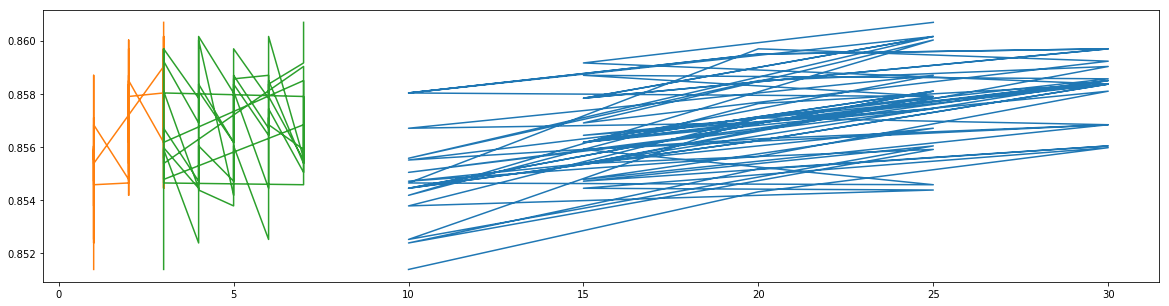

In [60]:
## Understanding the hypeparameters 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

plt.plot(model1.cv_results_['param_n_estimators'][::2].data,model1.cv_results_['mean_test_score'][::2])
plt.plot(model1.cv_results_['param_min_samples_leaf'][::2].data, model1.cv_results_['mean_test_score'][::2])
plt.plot(model1.cv_results_['param_min_samples_split'][::2].data, model1.cv_results_['mean_test_score'][::2],label='min_split')

plt.show()

## orange is for leavves , estimators is the blue and the split is the green 

In [171]:
# re tune the model within the best parameters 
## Hyperparameter tuning for the random forest
from sklearn.metrics import  make_scorer
scores=make_scorer(f1_score,average='weighted')
#hyper parameters set
params = {'n_estimators':[20,21,22,23,24,25,26],
          'min_samples_leaf':[2,3,4,5,6],
          'min_samples_split':[6,7,8,9], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1,scoring=scores,cv=2)
#learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 23, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.8595699495619856
Confusion Metrix:
 [[1660  232   66]
 [ 137 1413   63]
 [  16   15  165]]


In [172]:
print("Accuracy:",metrics.f1_score(prediction,y_test,average='weighted'))

Accuracy: 0.8623675773553738


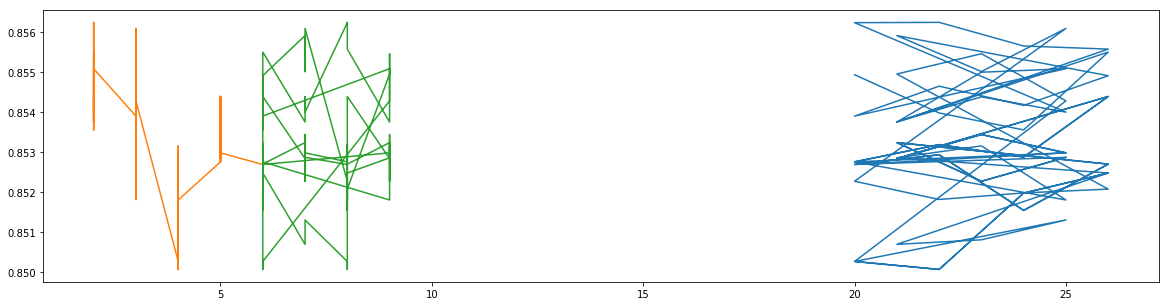

In [173]:
plt.figure(figsize=(20,5))
plt.plot(model1.cv_results_['param_n_estimators'][::2].data,model1.cv_results_['mean_test_score'][::2])
plt.plot(model1.cv_results_['param_min_samples_leaf'][::2].data, model1.cv_results_['mean_test_score'][::2])
plt.plot(model1.cv_results_['param_min_samples_split'][::2].data, model1.cv_results_['mean_test_score'][::2],label='min_split')

plt.show()

### Predict the pet category 

In [191]:
X['breed_category']=y1
# X_mat['breed_category']=X_mat['breed_category'].astype('category').cat.codes
dummy_X=pd.get_dummies(X[['color_type','issue_date_year','listing_date_year','condition','breed_category']])
X_=X[['height(cm)','length(m)','X1','X2']]
X_mat=pd.concat([dummy_X,X_],axis=1)
X_mat=X_mat.drop(['issue_date_year_1994','issue_date_year_1995','issue_date_year_1997'],axis=1)
X_mat.head()

,color_type,condition,breed_category,issue_date_year_1998,issue_date_year_1999,issue_date_year_2000,issue_date_year_2001,issue_date_year_2002,issue_date_year_2003,issue_date_year_2004,...,issue_date_year_2019,listing_date_year_2015,listing_date_year_2016,listing_date_year_2017,listing_date_year_2018,listing_date_year_2019,height(cm),length(m),X1,X2
0,18,2,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,7.78,0.80,13,9
1,53,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,14.19,0.72,13,9
2,15,2,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,40.90,0.15,15,4
3,53,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,17.82,0.62,0,1
4,2,2,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,11.06,0.50,18,4


In [101]:
len(X['issue_date_year'].value_counts())

25

In [192]:
X_train, X_test, y_train, y_test = train_test_split( X_mat, y2, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (15067, 34) (15067,)
Test set: (3767, 34) (3767,)


In [197]:
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.f1_score(prediction,y_test,average='weighted'))

C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.8138596772672131


In [198]:
## Hyperparameter tuning for the random forest
scores=make_scorer(f1_score,average='weighted')
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=5,scoring=scores)
#learning
model2.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model2.best_params_)
#Prediction
prediction=model2.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.f1_score(prediction,y_test,average='weighted'))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.8296657533193208
Confusion Matrix:
 [[   2    0    0    0]
 [   1 1062  199   15]
 [   7  379 1902   30]
 [   4   12    6  148]]


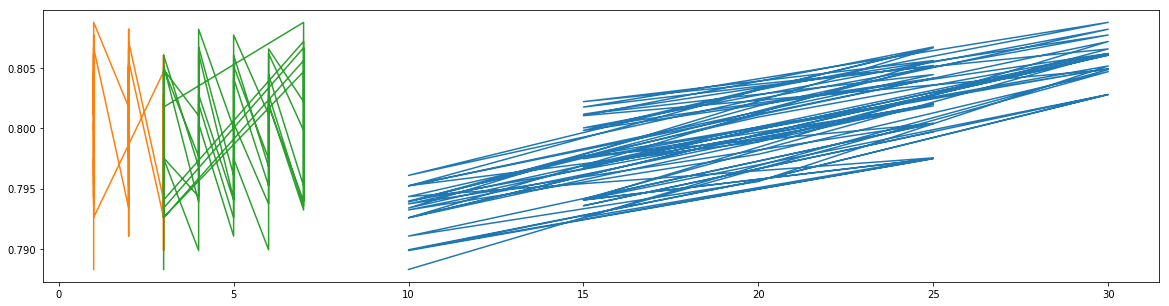

In [85]:
plt.figure(figsize=(20,5))
plt.plot(model2.cv_results_['param_n_estimators'][::2].data,model2.cv_results_['mean_test_score'][::2])
plt.plot(model2.cv_results_['param_min_samples_leaf'][::2].data, model2.cv_results_['mean_test_score'][::2])
plt.plot(model2.cv_results_['param_min_samples_split'][::2].data, model2.cv_results_['mean_test_score'][::2],label='min_split')

plt.show()

##  Predict on the test data now 

In [201]:
df_test=pd.read_csv('test.csv')
df_test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [134]:
df_test_transformed=pd.read_csv('df_test_transformed.csv')

In [174]:
df_test['issue_date_year']=df_test['issue_date'].map(lambda x: x.strip('-')[0:4])
df_test['listing_date_year']=df_test['listing_date'].map(lambda x: x.strip('-')[0:4])
df_test.drop(['listing_date','issue_date','pet_id'],1,inplace=True)

df_test['color_type'] =df_test['color_type'].astype('category').cat.codes
# test_df['color_type'] = test_df['color_type'].astype('category').cat.codes
df_test[['issue_date_year','listing_date_year']]=df_test[['issue_date_year','listing_date_year']].astype('category')

# this one is from knn imputation in R 
df_test['condition']=df_test_transformed['condition']
Y=df_test

In [243]:
dummy_Y=pd.get_dummies(Y[['color_type','issue_date_year','listing_date_year','condition']])
Y_=Y[['height(cm)','length(m)','X1','X2']]
Y_mat=pd.concat([dummy_Y,Y_],axis=1)
Y_mat=Y_mat.drop(['issue_date_year_1996','issue_date_year_1993'],axis=1)
Y_mat.head()

,color_type,condition,issue_date_year_1998,issue_date_year_1999,issue_date_year_2000,issue_date_year_2001,issue_date_year_2002,issue_date_year_2003,issue_date_year_2004,issue_date_year_2005,...,issue_date_year_2019,listing_date_year_2015,listing_date_year_2016,listing_date_year_2017,listing_date_year_2018,listing_date_year_2019,height(cm),length(m),X1,X2
0,2,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,42.73,0.87,0,7
1,36,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,6.71,0.06,0,1
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,41.21,0.24,0,7
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,8.46,0.29,7,1
4,14,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,30.92,0.71,0,7


In [244]:



X_mat.columns
for col,tes in zip(X_mat.columns,Y_mat.columns):
    if tes.startswith('issue'):
        print(col,tes)


breed_category issue_date_year_1998
issue_date_year_1998 issue_date_year_1999
issue_date_year_1999 issue_date_year_2000
issue_date_year_2000 issue_date_year_2001
issue_date_year_2001 issue_date_year_2002
issue_date_year_2002 issue_date_year_2003
issue_date_year_2003 issue_date_year_2004
issue_date_year_2004 issue_date_year_2005
issue_date_year_2005 issue_date_year_2006
issue_date_year_2006 issue_date_year_2007
issue_date_year_2007 issue_date_year_2008
issue_date_year_2008 issue_date_year_2009
issue_date_year_2009 issue_date_year_2010
issue_date_year_2010 issue_date_year_2011
issue_date_year_2011 issue_date_year_2012
issue_date_year_2012 issue_date_year_2013
issue_date_year_2013 issue_date_year_2014
issue_date_year_2014 issue_date_year_2015
issue_date_year_2015 issue_date_year_2016
issue_date_year_2016 issue_date_year_2017
issue_date_year_2017 issue_date_year_2018
issue_date_year_2018 issue_date_year_2019


In [213]:
model_breed=RandomForestClassifier(**model1.best_params_)
breed=model_breed.fit(X_mat,y1).predict(Y_mat)

In [245]:
model_pet=RandomForestClassifier(**model2.best_params_)
pet=model_pet.fit(X_mat,y2).predict(Y_mat)

ValueError: Number of features of the model must match the input. Model n_features is 34 and input n_features is 33 

In [190]:
Y_mat.head()

,color_type,condition,issue_date_year_1993,issue_date_year_1998,issue_date_year_1999,issue_date_year_2000,issue_date_year_2001,issue_date_year_2002,issue_date_year_2003,issue_date_year_2004,...,issue_date_year_2019,listing_date_year_2015,listing_date_year_2016,listing_date_year_2017,listing_date_year_2018,listing_date_year_2019,height(cm),length(m),X1,X2
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,42.73,0.87,0,7
1,36,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,6.71,0.06,0,1
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,41.21,0.24,0,7
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,8.46,0.29,7,1
4,14,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,30.92,0.71,0,7


In [240]:
Y_mat.columns

Index(['color_type', 'condition', 'issue_date_year_1993',
       'issue_date_year_1998', 'issue_date_year_1999', 'issue_date_year_2000',
       'issue_date_year_2001', 'issue_date_year_2002', 'issue_date_year_2003',
       'issue_date_year_2004', 'issue_date_year_2005', 'issue_date_year_2006',
       'issue_date_year_2007', 'issue_date_year_2008', 'issue_date_year_2009',
       'issue_date_year_2010', 'issue_date_year_2011', 'issue_date_year_2012',
       'issue_date_year_2013', 'issue_date_year_2014', 'issue_date_year_2015',
       'issue_date_year_2016', 'issue_date_year_2017', 'issue_date_year_2018',
       'issue_date_year_2019', 'listing_date_year_2015',
       'listing_date_year_2016', 'listing_date_year_2017',
       'listing_date_year_2018', 'listing_date_year_2019', 'height(cm)',
       'length(m)', 'X1', 'X2'],
      dtype='object')

In [246]:
pet=xgbclf.fit(X_mat,y2).predict(Y_mat)

[16:10:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




ValueError: operands could not be broadcast together with shapes (8072,33) (34,) (8072,33) 

In [ ]:
pet_x

In [228]:
submission=pd.DataFrame({'pet_id':df_test['pet_id'],
             'breed_category':breed,
             'pet_category':pet})

submission.to_csv("prediction_python.csv",index=False)

In [203]:
submission.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2


In [206]:
submission['breed_category'].value_counts()

0.0    3775
1.0    3384
2.0     913
Name: breed_category, dtype: int64

# Try using xgboost 

In [219]:
! pip install xgboost

In [221]:
#required libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import FeatureUnion, make_pipeline 
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import  RobustScaler


#create a feature union where all features will be imputed using KNNimputer

transformer = FeatureUnion(
    transformer_list = [
                        ('rb_scaler',RobustScaler())
    ]
)

params = {
    'min_child_weight':10,
    'eta':0.005,
    'colsample_bytree':0.7,
    'learning_rate':0.1,
    'max_depth': 20,
    'subsample':0.9,
    'lambda':5,
    'booster':'gbtree',
    'eval_metric':'roc_auc',
    'gamma':0.5,
    'alpha':0.04,
    'silent':0,
    'num_boost_round':1000000000,
    'n_estimators':300,
    'n_jobs':10

}


xgbclf = make_pipeline(transformer, xgb.XGBClassifier(params=params, objective='multi:softmax',))
xgbclf = xgbclf.fit(X_train, y_train)
prediction1 = xgbclf.predict(X_test)


[15:51:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [224]:
print("Accuracy:",metrics.f1_score(prediction1,y_test,average='weighted'))

Accuracy: 0.8768288221667515


In [229]:
help(xgb)

Help on package xgboost:

NAME
    xgboost - XGBoost: eXtreme Gradient Boosting library.

DESCRIPTION
    Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md

PACKAGE CONTENTS
    callback
    compat
    core
    dask
    libpath
    plotting
    rabit
    sklearn
    tracker
    training

CLASSES
    builtins.object
        xgboost.core.Booster
        xgboost.core.DMatrix
            xgboost.core.DeviceQuantileDMatrix
        xgboost.tracker.RabitTracker
    sklearn.base.BaseEstimator(builtins.object)
        xgboost.sklearn.XGBModel
            xgboost.sklearn.XGBClassifier(xgboost.sklearn.XGBModel, sklearn.base.ClassifierMixin)
                xgboost.sklearn.XGBRFClassifier
            xgboost.sklearn.XGBRanker
            xgboost.sklearn.XGBRegressor(xgboost.sklearn.XGBModel, sklearn.base.RegressorMixin)
                xgboost.sklearn.XGBRFRegressor
    
    class Booster(builtins.object)
     |  Booster(params=None, cache=(), model_file=None)
     |  
    

In [230]:
params = {
    'min_child_weight':10,
    'eta':0.005,
    'colsample_bytree':0.7,
    'learning_rate':0.1,
    'max_depth': 20,
    'subsample':0.9,
    'lambda':5,
    'booster':'gbtree',
    'eval_metric':'roc_auc',
    'gamma':0.5,
    'alpha':0.04,
    'silent':0,
    'num_boost_round':1000000000,
    'n_estimators':300,
    'n_jobs':10

}

In [234]:
import xgboost as xgb

In [236]:
xgb_=xgb.XGBClassifier(params=params, objective='multi:softmax')
xgb_.fit(X_train, y_train)
prediction1 = xgbclf.predict(X_test)
print("F1:",metrics.f1_score(prediction1,y_test,average='weighted'))

[16:04:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1: 0.9336065525014241


###  XGB tuning and feature selection

In [ ]:
## tuning xgboost important notes 
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

In [247]:

model =xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

> Optimize **max_depth parameter**. It represents the depth of each tree, which is the maximum number of different features used in each tree. I recommend going from a low max_depth (3 for instance) and then increasing it incrementally by 1, and stopping when there’s no performance gain of increasing it. This will help simplify your model and avoid overfitting

> Now play around with the learning rate and the features that avoids overfitting:

> **learning_rate**: usually between 0.1 and 0.01. If you’re focused on performance and have time in front of you, decrease incrementally the learning rate while increasing the number of trees.

> **subsample**, which is for each tree the % of rows taken to build the tree. I recommend not taking out too many rows, as performance will drop a lot. Take values from 0.8 to 1.

> **colsample_bytree**: number of columns used by each tree. In order to avoid some columns to take too much credit for the prediction (think of it like in recommender systems when you recommend the most purchased products and forget about the long tail), take out a good proportion of columns. Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), or 0.8 to 1 if you only have a few columns.

> **gamma**: usually misunderstood parameter, it acts as a regularization parameter. Either 0, 1 or 5.

It also always advisable to look at the feature importance graphs 

In [255]:
print(model.feature_importances_)

[0.12490082 0.0423792  0.1493212  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01977934 0.         0.03109664 0.02295316
 0.03260496 0.03503116 0.03575365 0.03317165 0.04440471 0.0503242
 0.01661818 0.         0.04553013 0.02880502 0.03522777 0.02447664
 0.         0.02070753 0.11314781 0.09376622]


<Figure size 1440x720 with 0 Axes>

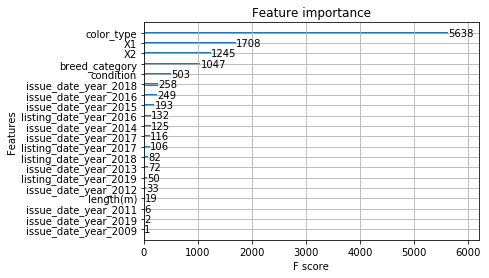

In [262]:
plt.figure(figsize=(20,10))
xgb.plot_importance(model)
plt.show()

In [263]:
# using xgboost for feature selection
from sklearn.feature_selection import SelectFromModel

> We can test multiple thresholds for selecting features by feature importance. Specifically, the feature importance of each input variable, essentially allowing us to test each subset of features by importance, starting with all features and ending with a subset with the most important feature.

In [272]:
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
    if thresh>0:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model =xgb.XGBClassifier()
        selection_model.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = metrics.f1_score(y_test, predictions,average='weighted',labels=np.unique(y_pred)) # since set(y_test) - set(y_pred) \neq 0
        print("Thresh=%.3f, n=%d,f_1_score: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.017, n=20,f_1_score: 87.46%
Thresh=0.020, n=19,f_1_score: 87.80%
Thresh=0.021, n=18,f_1_score: 87.61%
Thresh=0.023, n=17,f_1_score: 88.31%
Thresh=0.024, n=16,f_1_score: 88.25%
Thresh=0.029, n=15,f_1_score: 88.10%
Thresh=0.031, n=14,f_1_score: 88.22%
Thresh=0.033, n=13,f_1_score: 88.02%
Thresh=0.033, n=12,f_1_score: 88.09%
Thresh=0.035, n=11,f_1_score: 87.73%
Thresh=0.035, n=10,f_1_score: 87.90%
Thresh=0.036, n=9,f_1_score: 87.94%
Thresh=0.042, n=8,f_1_score: 87.93%
Thresh=0.044, n=7,f_1_score: 87.75%
Thresh=0.046, n=6,f_1_score: 87.47%
Thresh=0.050, n=5,f_1_score: 87.39%
Thresh=0.094, n=4,f_1_score: 86.80%
Thresh=0.113, n=3,f_1_score: 86.56%
Thresh=0.125, n=2,f_1_score: 83.07%
Thresh=0.149, n=1,f_1_score: 45.20%


C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This means that there is no F-score to calculate for a label, and thus the F-score for this case is considered to be 0.0. Since we have requested an average of the score, one must take into account that a score of 0 was included in the calculation,

In [274]:
# select features using threshold
selection = SelectFromModel(model, threshold=0.033, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = xgb.XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
accuracy = metrics.f1_score(y_test, y_pred,average='weighted')
accuracy

0.8808549597979416

In [279]:
print(set(y_test) - set(y_pred),set(y_test),set(y_pred))

set() {0, 1, 2, 4} {0, 1, 2, 4}


#### Tuning 

In [290]:
estimator = xgb.XGBClassifier(
    objective= 'multi:softmax',
    nthread=4,
    seed=42
)
parameters = {'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01,0.05],
    'subsample':[0.8,0.85,0.9,1],
    'colsample_bytree':[0.4,0.5,0.6]}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


ValueError: multiclass format is not supported